<a href="https://colab.research.google.com/github/Inquipatia/ChildNote/blob/master/Egresados_Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este ejemplo cargaremos un archivo .csv de entrada que contiene diversas URLs a artículos sobre Machine Learning de algunos sitios muy importantes como Techcrunch o KDnuggets y como características de entrada -las columnas- tendremos:

Title: Titulo del Artículo

url: ruta al artículo,

**Word count**: la cantidad de palabras del artículo,

Nº of Links: los enlaces externos que contiene,

**Nº of comments**: cantidad de comentarios,

**Nº Images video**: suma de imágenes (o videos),

Elapsed days: la cantidad de días transcurridos (al momento de crear el archivo),

**Nº Shares**: nuestra columna de salida que será la “cantidad de veces que se compartió el artículo”.

A partir de las características de un artículo de machine learning intentaremos predecir, cuantas veces será compartido en Redes Sociales.

Haremos una primer predicción de Regresión Lineal Simple -con una sola variable predictora- para poder graficar en 2 dimensiones (ejes X e Y) y luego un ejemplo de Regresión Lineal Múltiple, en la que utilizaremos 3 dimensiones (X,Y,Z) y predicciones.

Predicción: ¿Cuántas veces será compartido un artículo del Blog?

Comencemos por importar las librerías que utilizaremos:

In [1]:
# Activamos los Imports necesarios
#Libreria Matemática
import numpy as np
#Libreria ára manipulación de datos
import pandas as pd
#Librerias gráficas
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#Parametros para gráficos
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
#Libreria de aprendizaje automático Sklearn
from sklearn import linear_model
#Metricas
#Ver presentación 2 lámina 46
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
dataframe =pd.read_csv("articulos_ml.csv")
dataframe

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000
...,...,...,...,...,...,...,...,...
156,[Log] 83: How Google Uses Machine Learning And...,[Log] 83: http://feedproxy.google.com/~r/Techc...,3239,3,11.0,1,84,3239
157,[Log] 84: Zuck Knows If You've Been Bad Or Goo...,[Log] 84: http://feedproxy.google.com/~r/Techc...,2566,3,8.0,4,85,25019
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4.0,1,86,49614
159,[Log] 86: How Google's Acquisition Of DNNresea...,[Log] 86: http://feedproxy.google.com/~r/Techc...,1530,4,12.0,3,87,33660


In [7]:
#Nos devuelve (161,8)

#Veamos esas primeras filas:
dataframe.shape

(161, 8)

Se ven algunos campos con valores NaN (nulos) por ejemplo algunas urls o en comentarios.

En nuestro caso la columna Shares será nuestra salida, es decir nuestro valor "Y", el valor que queremos predecir

Veamos algunas estadísticas básicas de nuestros datos de entrada:

In [8]:
dataframe.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


Aqui vemos que la media de palabras en los artículos es de 1808.

El artículo más corto tiene 250 palabras y el más extenso 8401.

Intentaremos ver con nuestra relación lineal, si hay una correlación entre la **cantidad de palabras del texto y la cantidad de Shares obtenidos**.

Visualización General
Hacemos una visualización en general de los datos de entrada:

<ipython-input-9-a23402930e06>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe.drop(['Elapsed days','Title','url'],1).hist()


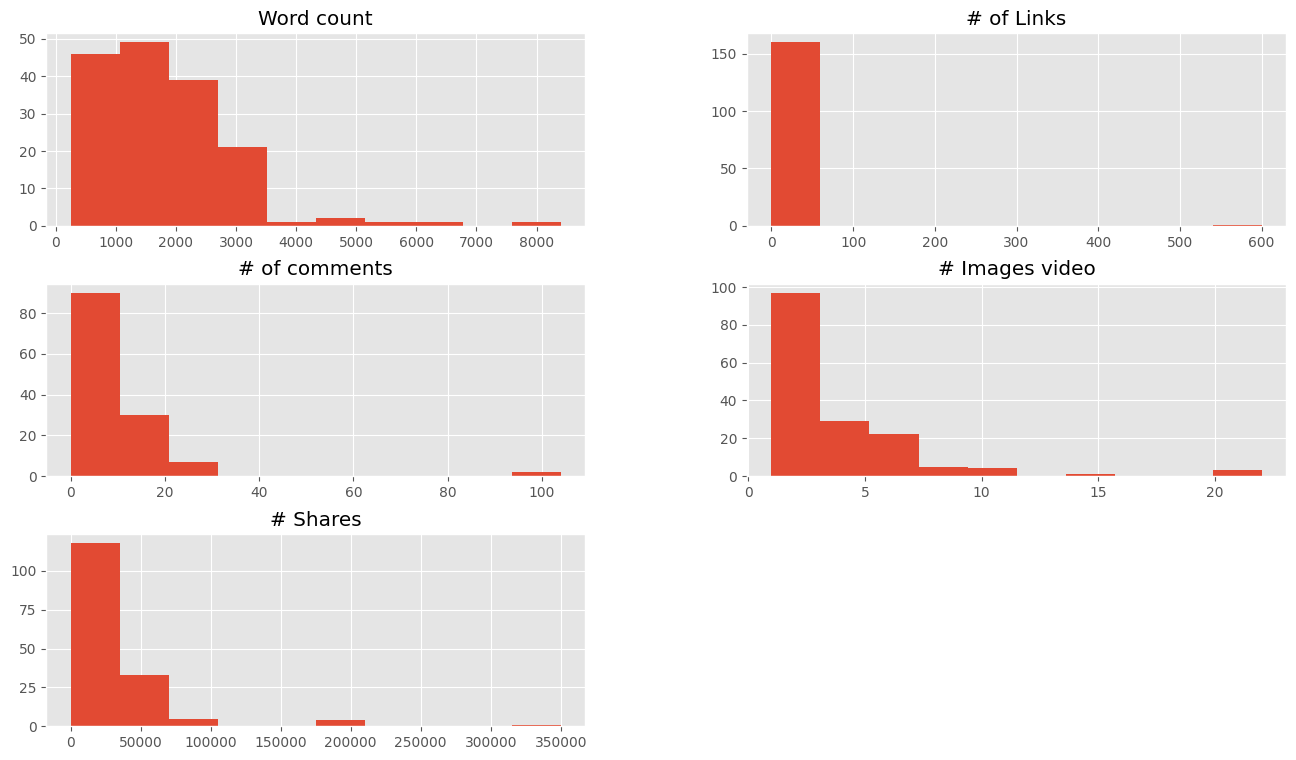

In [9]:
dataframe.drop(['Elapsed days','Title','url'],1).hist()
plt.show()
#Dejamos fuera algunas columnas

En estas gráficas vemos entre qué valores se concentran la mayoría de registros.

Visualizamos Cantidad de Palabras vs. Compartidos **texto en negrita**

Vamos a filtrar los datos de cantidad de palabras para quedarnos con los registros con menos de 3500 palabras y también con los que tengan Cantidad de compartidos menos a 80.000.

 Lo destacaremos pintando en azul los puntos con menos de 1808 palabras (la media) y en naranja los que tengan más.

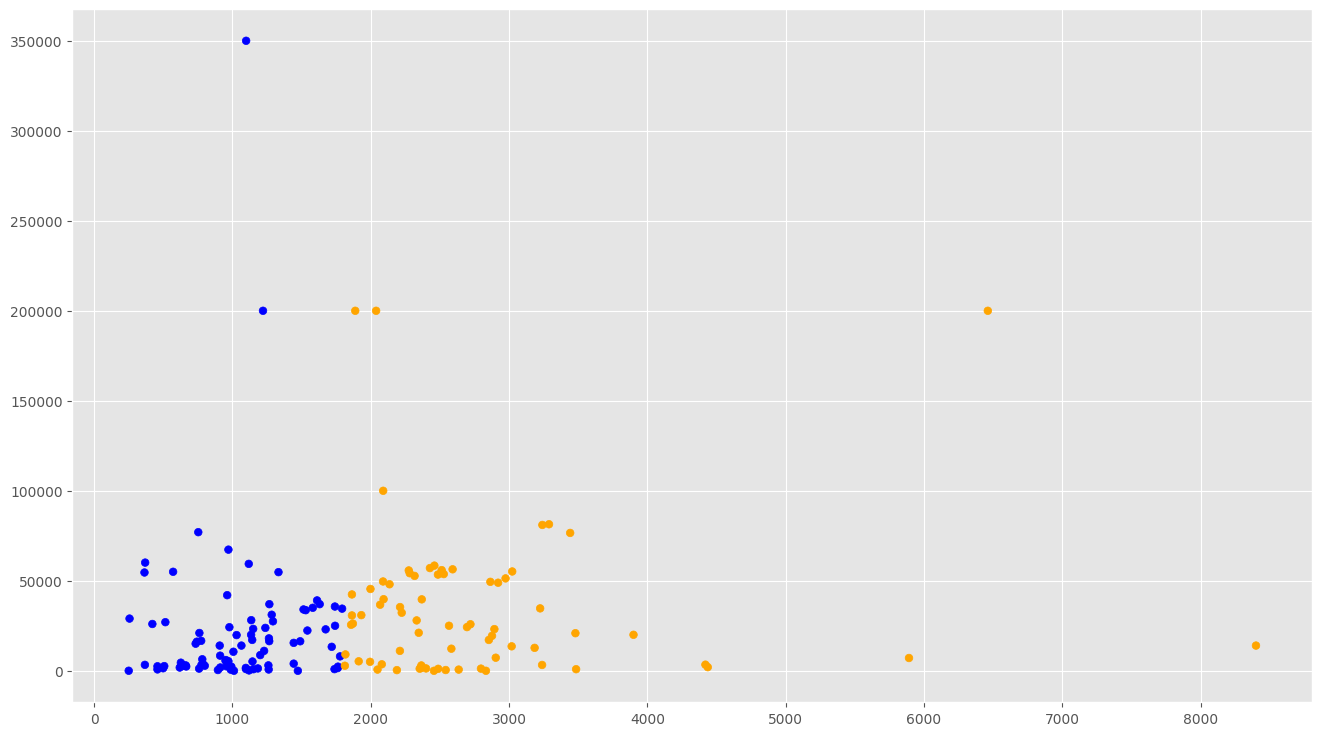

In [10]:
#vamos a Visualizar los datos de entrada
colores=['orange','blue']
tamanios=[30,60]

f1 = dataframe['Word count'].values
f2 = dataframe['# Shares'].values

# Vamos a pintar en 2 colores los puntos por debajo de la media de Cantidad de Palabras
asignar=[]
for index, row in dataframe.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
#Graficamos    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
#Mostrar el gráfico
plt.show()

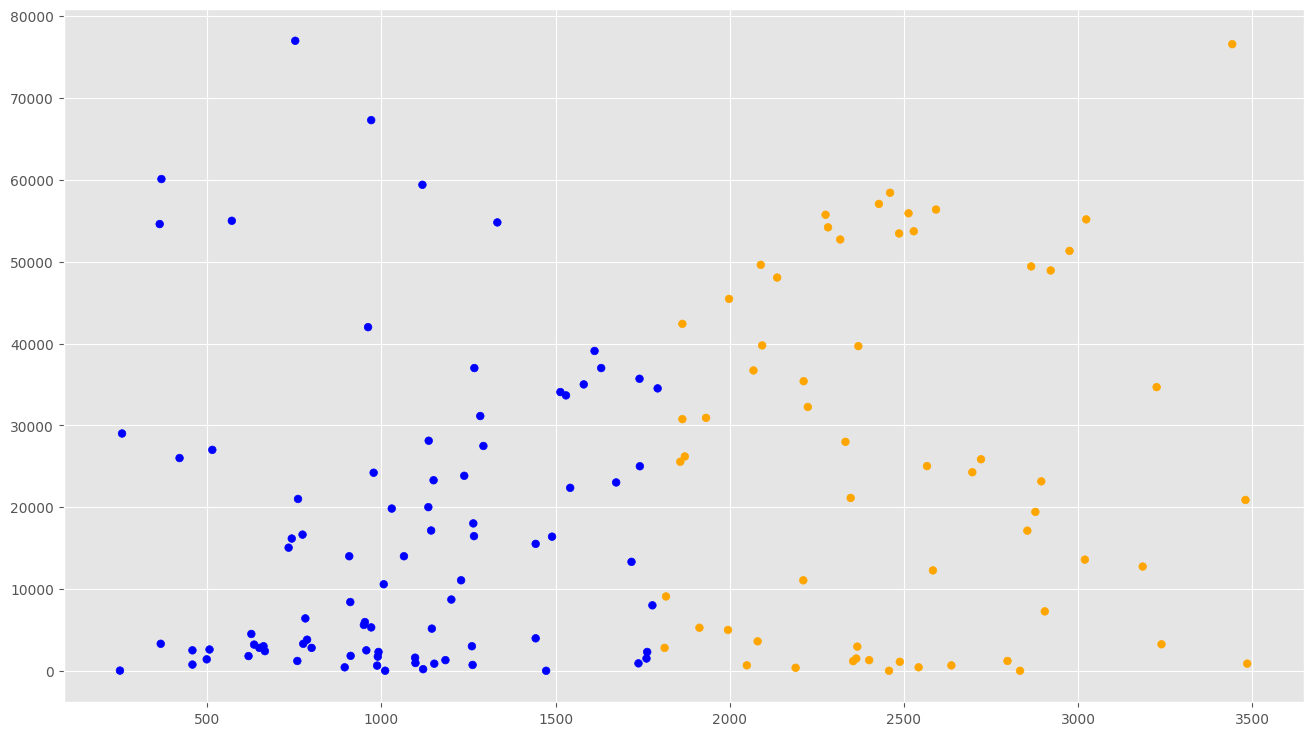

In [11]:
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = dataframe[(dataframe['Word count'] <= 3500) & (dataframe['# Shares'] <= 80000)]

colores=['orange','blue']
tamanios=[30,60]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [12]:
#Estadística para los datos filtrados
filtered_data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,148.000000,148.000000,121.000000,148.000000,148.000000,148.000000
mean,1640.209459,5.743243,7.256198,3.331081,91.554054,20545.648649
std,821.975365,6.064418,6.346297,2.706476,91.143923,19933.865031
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,971.000000,3.000000,2.000000,1.000000,28.750000,2750.000000
50%,1536.000000,5.000000,6.000000,3.000000,60.000000,15836.000000
75%,2335.750000,7.000000,11.000000,4.000000,110.500000,34177.500000
max,3485.000000,49.000000,30.000000,22.000000,349.000000,77000.000000


**Regresión Lineal simple con Python y SKLearn (1 variable)**

Vamos a crear nuestros datos de entrada por el momento sólo **Word Count y como etiquetas los # Shares**.

Creamos el objeto LinearRegression y lo hacemos “encajar” (entrenar) con el método fit(). Finalmente imprimimos los coeficientes y puntajes obtenidos.

In [13]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva es una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

#EVALUANDO DEL DESEMPEÑO DEL MODELO
# Veamos los coeficientes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0 indica que el modelo se ajusta mejor a los datos de entrenamiento
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [5.69765366]
Independent term: 
 11200.30322307416
Mean squared error: 372888728.34
Variance score: 0.06


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente 5,69 y el término independiente “b” es 11200. Tenemos un Error Cuadrático medio enorme… por lo que en realidad este modelo no será muy bueno, Pero estamos aprendiendo a usarlo, que es lo que nos importa ahora.

Esto también se ve reflejado en el puntaje de Varianza que debería ser cercano a 1.0.

Visualizamos la recta obtenida

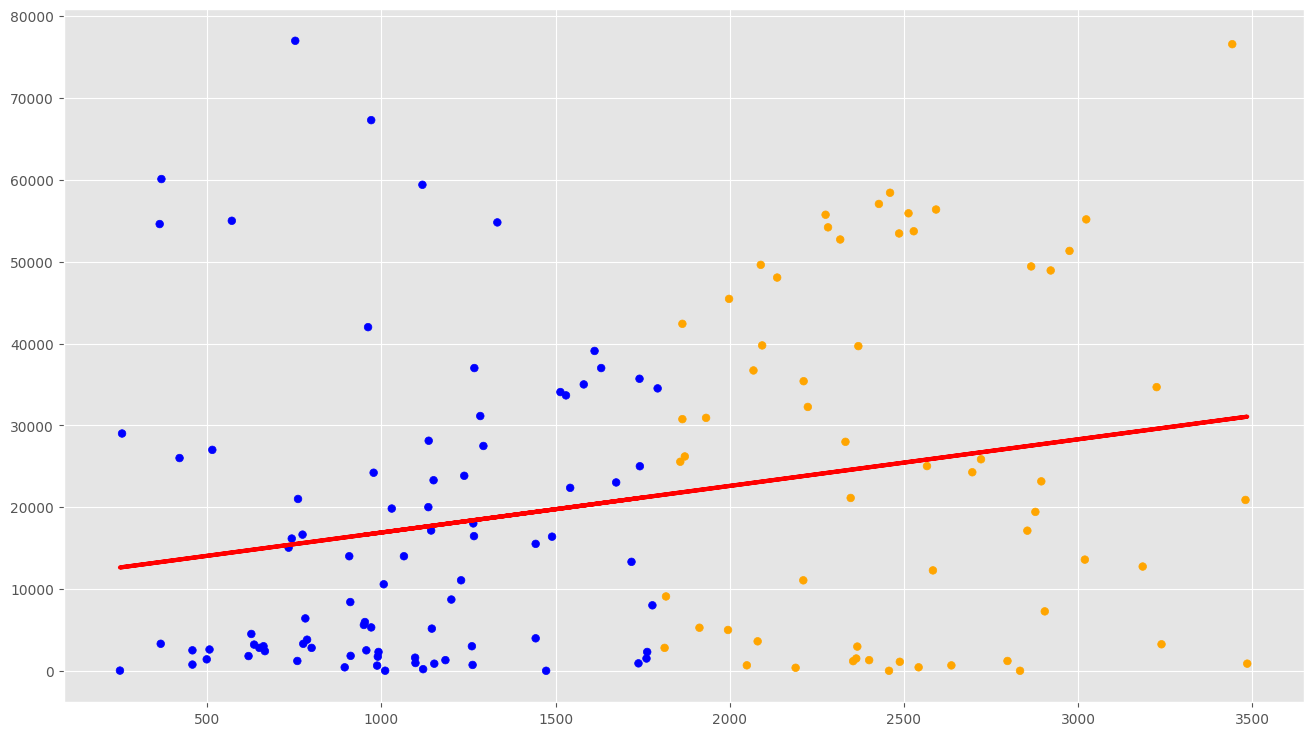

In [14]:
plt.scatter(X_train[:,0],y_train,c=asignar,s=tamanios[0])
plt.plot(X_train[:,0],y_pred,color='red',linewidth=3)
plt.xlabel="Cantidad de Palabras"
plt.ylabel="Compartidos en red"
plt.title="Regresion lineal"
plt.show()

**Predicción en regresión lineal simple**

Vamos a intentar probar nuestro algoritmo, suponiendo que quisiéramos predecir cuántos “compartir” obtendrá un articulo sobre Machine learning de 2000 palabras.

In [15]:
y_DosMil=regr.predict([[2000]])
print(int(y_DosMil))

22595


**Regresión Lineal Múltiples (múltiples variables)**

In [16]:
#Estamos sumando la cantidad de link, comentarios e imagenes del articulo
#Buscaremos si usando multiples variables mejoramos nuestro modelo
suma = (filtered_data['# of Links'] + filtered_data['# of comments'].fillna(0) + filtered_data["# Images video"])
#Nuevo dataframe
dataX2 =pd.DataFrame()
dataX2["Word count"]=filtered_data["Word count"]
dataX2["suma"]=suma
XY_train =np.array(dataX2)

z_train=filtered_data["# Shares"].values
#Atención: Esta vez, nuestras dimensiones de entrenamiento serán X e Y y las etiquetas de predicción serán z.

In [17]:
dataX2

,Word count,suma
1,1742,18.0
2,962,7.0
5,761,1.0
7,753,4.0
8,1118,3.0
...,...,...
156,3239,15.0
157,2566,15.0
158,2089,9.0
159,1530,19.0


In [18]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

#Esta vez visualizamos un plano

Coefficients: 
 [   6.63216324 -483.40753769]
Mean squared error: 352122816.48
Variance score: 0.11


In [19]:
fig = plt.figure()
ax = Axes3D(fig)

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 

# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)

# Graficamos en rojo, los puntos que 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)

# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)
        
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')

Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

<Figure size 1600x900 with 0 Axes>

In [20]:
#Predicción 2
z_DosMil = regr2.predict([[2000,10+4+6]])
print(int(z_DosMil))

20518


Comparemos las predicciónes obtenidas en los modelos

En este caso, Obtuvimos mejora en el modelo de 2 dimensiones

In [21]:
mejoraEnError =mean_squared_error(y_train,y_pred) - mean_squared_error(z_train,z_pred)
print (int(mejoraEnError))

20765911


In [22]:
mejoraEnVarianza=r2_score(z_train,z_pred)- r2_score(y_train,y_pred)
print(mejoraEnVarianza)

0.052615337462582956


In [23]:
diferenciaCompartir =z_DosMil-y_DosMil
print(int(diferenciaCompartir))

-2077


**Mejorar las predicciones y notas finales**

En este ejemplo utilizamos información de artículos sobre Machine Learning con algunos datos ficticios en nuestro .csv pero si quisieramos tratar de mejorar las predicciones, deberiamos utilizar más de 2 variables (recordemos que aqui lo hicimos para poder graficar en 3D).

Sería conveniente además conseguir mejores características de entrada, pues no es lo mismo un enlace de un portal con multitud de visitas al mes, que otros Blogs más modestos.